<center>
    <h1 id='underfitting-and-overfitting' style='color:#7159c1'>🧠 Underfitting and Overfitting 🧠</h1>
    <i>Avoiding the main Deep Learning Problems</i>
</center>

Some Key Concepts:

> **Signal** - `it's the generalization, helping the model to get good results with new datas in the validation, prediction and production steps`;

> **Noise** - `it's the fluctuation/gaps/problems present ONLY in the training data, so, noises don't help the model to get good predictions in the future`;

---

> **Underfitting**

- the model doesn't learn enough;
- it gets bad results in both training and validation steps;
- the loss is high OR the train and valid loss just decrease;
- the model didn't learn the enough signals.

<br />

> **Overfitting**

- the model learns more than the expected;
- it gets great results in the training step, but bad ones in the validation step;
- the loss is not too much high in the traning step, but it's too much high in the; validation one
- the model learns signals/noises more than enough.

---

The Data Scientist's goal is to make the model learns a few noises and a good amount of signals (but not too much). However, we gotta a problem: as many signals the model learns, as many noises it'll learn too!

So, to overcome this trade, Data Scientists have to get the BALANCE between signal and noise in order to avoid Underfitting and Overfitting.

---



In [1]:
# ---- Importations ----
import pandas as pd # pip install pandas
from sklearn.model_selection import train_test_split # pip install sklearn
import tensorflow as tf # pip install tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt # pip install matplotlib
import mplcyberpunk # pip install mplcyberpunk

plt.style.use('cyberpunk')

# ---- Preparing Dataset ----
autos_df = pd.read_csv('./datasets/autos.csv')
autos_df = autos_df.select_dtypes(exclude='object')

X = autos_df.copy()
y = X.pop('price')

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y
    , train_size=0.70
    , test_size=0.30
    , random_state=20242301
)

<h1 id='0-capacity' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>0 | Capacity</h1>

- It's the capacity of the model to learn new patterns;

- If the model gets Underfitting, we have to increase the model's capacity. If the model gets Overfitting, we have to decrease the capacity;

- If the problem is the LINEAR RELATIONSHIPS, we gotta make the model wider (more units/neurons in each layer) for Underfitting; and less wider for Overfitting;

- If the problem is the NON-LINEAR RELATIONSHIPS, we gotta make the model deeper (more layers) for Underfitting; and less deeper for Overfitting.

In the examples below, consider that the model is being underfitting and we decided to increase the depth and the wide.

In [2]:
# ---- First Version of the Model ----
model_1 = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=[2])
    , layers.Dense(1)
])

# ---- Wider: More units/neurons per Layer ----
wider = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[2])
    , layers.Dense(1)
])

# ---- Deeper: More Layers ----
deeper = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=[2])
    , layers.Dense(16, activation='relu')
    , layers.Dense(1)
])

<h1 id='1-early-stopping' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>1 | Early Stopping</h1>

- it helps the model doesn't learn too many noises in order to get underfitting and overfitting;

- this technique checks out the loss of the model for each batch and, if it realizes that the loss is not decreasing after X epochs anymore, it'll stop the model of fitting .

In [3]:
# ---- Early Stopping ----
#
# Parameters:
#
# - min_delta >> minimum amount of change to the early stop
# consider that the loss function is decreasing and the model
# is improving (in this example, for each 0.001 the loss decreases
# is considered as an improvement for the model);
#
# - patience >> how many epochs without decreasing the loss value
# the early stopping will wait to stop the trainig;
#
# - restore_best_weights >> gets the weights that resulted in the
# lower loss value
#
# In a nutshell, if there hasn't been at least an improvement of 
# 0.001 in the validation loss over the previous 20 epochs, then
# stop the training and keep the best model you found.
#
early_stopping = EarlyStopping(
    min_delta=0.001
    , patience=20
    , restore_best_weights=True
)

<h1 id='2-final-example' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>2 | Final Example</h1>

- Minimum Validation Loss: 24777640.0


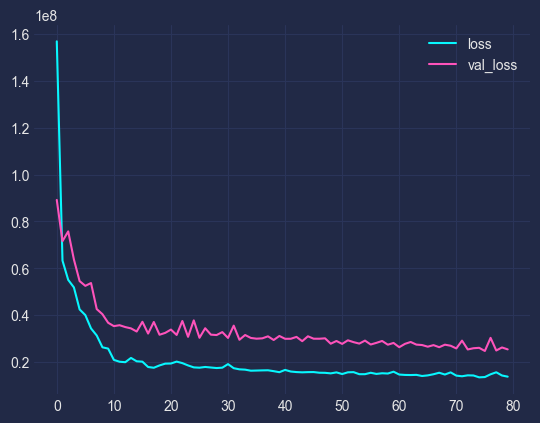

In [6]:
# ---- Early Stopping ----
early_stopping = EarlyStopping(
    min_delta=0.001
    , patience=20
    , restore_best_weights=True
)

# ---- Creating the Model ----
model = keras.Sequential([
    # hidden layers
    layers.Dense(units=512, activation='relu', input_shape=[16])
    , layers.Dense(units=512, activation='relu')
    , layers.Dense(units=512, activation='relu')
    
    # output layer
    , layers.Dense(units=1)
])

# ---- Optimizer and Loss Functions ----
model.compile(optimizer='adam', loss='mse')

# ---- Training ----
history = model.fit(
    X_train, y_train
    , validation_data=(X_valid, y_valid)
    , batch_size=25
    , epochs=80
    , callbacks=[early_stopping]
    , verbose=0
)

# ---- Plotting Results ----
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print(f'- Minimum Validation Loss: {history_df["val_loss"].min()}')

---

<h1 id='reach-me' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>📫 | Reach Me</h1>

> **Email** - [csfelix08@gmail.com](mailto:csfelix08@gmail.com?)

> **Linkedin** - [linkedin.com/in/csfelix/](https://www.linkedin.com/in/csfelix/)

> **GitHub:** - [CSFelix](https://github.com/CSFelix)

> **Kaggle** - [DSFelix](https://www.kaggle.com/dsfelix)

> **Portfolio** - [CSFelix.io](https://csfelix.github.io/).